# LENDING CLUB CASE STUDY

## Data Cleaning

The data cleaning includes the following:

    1. Handling of missing data
    2. Analysis of columns to understand which columns are necessary for the case study
    3. Standardizing of the values in columns. 
    

In [2]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
import statsmodels.api as sm

In [3]:
loan_df = pd.read_csv('loan.csv', encoding='palmos')

C:\Users\deept\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [5]:
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [6]:
loan_df.shape

(39717, 111)

In [7]:
round(100*(loan_df.isnull().sum()/len(loan_df.id)), 2)

id                              0.0
member_id                       0.0
loan_amnt                       0.0
funded_amnt                     0.0
funded_amnt_inv                 0.0
                              ...  
tax_liens                       0.1
tot_hi_cred_lim               100.0
total_bal_ex_mort             100.0
total_bc_limit                100.0
total_il_high_credit_limit    100.0
Length: 111, dtype: float64

In [8]:
#dropping columns with all null values

loan_df = loan_df.dropna(how='all', axis=1)
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,Jun-16,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [9]:
# check how many rows have all missing values
loan_df.isnull().all(axis=1).sum()


0

In [10]:
# Finding the percentage of missiong values
round(100*(loan_df.isnull().sum()/len(loan_df.id)), 2)


id                             0.00
member_id                      0.00
loan_amnt                      0.00
funded_amnt                    0.00
funded_amnt_inv                0.00
term                           0.00
int_rate                       0.00
installment                    0.00
grade                          0.00
sub_grade                      0.00
emp_title                      6.19
emp_length                     2.71
home_ownership                 0.00
annual_inc                     0.00
verification_status            0.00
issue_d                        0.00
loan_status                    0.00
pymnt_plan                     0.00
url                            0.00
desc                          32.58
purpose                        0.00
title                          0.03
zip_code                       0.00
addr_state                     0.00
dti                            0.00
delinq_2yrs                    0.00
earliest_cr_line               0.00
inq_last_6mths              

In [11]:
missing_col =  round(100*(loan_df.isnull().sum()/len(loan_df.id)), 2)
missing_col[missing_col!=0]


emp_title                      6.19
emp_length                     2.71
desc                          32.58
title                          0.03
mths_since_last_delinq        64.66
mths_since_last_record        92.99
revol_util                     0.13
last_pymnt_d                   0.18
next_pymnt_d                  97.13
last_credit_pull_d             0.01
collections_12_mths_ex_med     0.14
chargeoff_within_12_mths       0.14
pub_rec_bankruptcies           1.75
tax_liens                      0.10
dtype: float64

In [12]:
#dropping columns "mths_since_last_delinq"  "mths_since_last_record" and "next_pymnt_d " as they contain a lot of null values
loan_df = loan_df.drop(['mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d'], axis=1)
missing_col =  round(100*(loan_df.isnull().sum()/len(loan_df.id)), 2)
missing_col[missing_col!=0]

emp_title                      6.19
emp_length                     2.71
desc                          32.58
title                          0.03
revol_util                     0.13
last_pymnt_d                   0.18
last_credit_pull_d             0.01
collections_12_mths_ex_med     0.14
chargeoff_within_12_mths       0.14
pub_rec_bankruptcies           1.75
tax_liens                      0.10
dtype: float64

In [13]:
#title,revol_util,last_pymnt_d, last_credit_pull_d, collections_12_mths_ex_med, 
#chargeoff_within_12_mths, tax_liens, 
#all these columns have very low missing values, hence we can drop these rows

loan_df = loan_df[~loan_df['title'].isnull()]
loan_df = loan_df[~loan_df['collections_12_mths_ex_med'].isnull()]
loan_df = loan_df[~loan_df['last_pymnt_d'].isnull()]
loan_df = loan_df[~loan_df['chargeoff_within_12_mths'].isnull()]
loan_df = loan_df[~loan_df['tax_liens'].isnull()]
loan_df = loan_df[~loan_df['revol_util'].isnull()]
loan_df = loan_df[~loan_df['last_credit_pull_d'].isnull()]

In [14]:
missing_col =  round(100*(loan_df.isnull().sum()/len(loan_df.id)), 2)
missing_col[missing_col!=0]

emp_title                6.16
emp_length               2.70
desc                    32.60
pub_rec_bankruptcies     1.62
dtype: float64

In [15]:
len(loan_df['emp_title'].unique()) #not a categorical feature

28693

In [16]:
len(loan_df['emp_length'].unique()) #categorical feature

12

In [17]:
loan_df['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [18]:
loan_df['emp_length'].value_counts()

10+ years    8865
< 1 year     4544
2 years      4370
3 years      4080
4 years      3416
5 years      3264
1 year       3214
6 years      2222
7 years      1766
8 years      1472
9 years      1252
Name: emp_length, dtype: int64

In [19]:
len(loan_df['pub_rec_bankruptcies'].unique())

4

In [20]:
loan_df['pub_rec_bankruptcies'].unique() #categorical feature

array([ 0.,  1.,  2., nan])

In [21]:
loan_df['pub_rec_bankruptcies'].value_counts()

0.0    37217
1.0     1665
2.0        7
Name: pub_rec_bankruptcies, dtype: int64

In [22]:
#pub_rec_bankruptcies is a categorical column, usually categorical column is imputed with mode, but 
#here we would be creating a much more biased data if we imputed with mode which is 0.
#Hence, it is best to get rid of these rows

loan_df = loan_df[~loan_df['pub_rec_bankruptcies'].isnull()]
missing_col =  round(100*(loan_df.isnull().sum()/len(loan_df.id)), 2)
missing_col[missing_col!=0]

emp_title      6.18
emp_length     2.74
desc          33.14
dtype: float64

In [23]:
#desc(description) has got around 33 percent of missing data, we cannot impute the missing values as this is a text 
#form, getting rid of the rows will lead to loss of data, the best approach is deleting the column as 
#the desc can be derived or understood from the title column. 

loan_df = loan_df.drop('desc',axis=1)
missing_col =  round(100*(loan_df.isnull().sum()/len(loan_df.id)), 2)
missing_col[missing_col!=0]

emp_title     6.18
emp_length    2.74
dtype: float64

In [24]:
#deleting rows which have null values for title and length
loan_df=loan_df[~loan_df.emp_title.isnull()]
loan_df=loan_df[~loan_df.emp_length.isnull()]
loan_df.shape

(36431, 53)

In [25]:
#now we have 53 columns. We have to reduce and use only those which are useful for analysis of loan default.

In [26]:
loan_df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'purpose', 'title',
       'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

In [27]:
#id, member_id,url is unique for all the records in the data, it wont be useful in default analysis
loan_df = loan_df.drop(['id','member_id','url'],axis=1)

In [28]:
loan_df['zip_code']

1        309xx
3        917xx
4        972xx
5        852xx
6        280xx
         ...  
39433    904xx
39475    604xx
39551    201xx
39562    226xx
39623    207xx
Name: zip_code, Length: 36431, dtype: object

In [29]:
#zip_code only has the first 3 numbers,this contains redundant this will not be usefull for the analysis
loan_df = loan_df.drop(['zip_code'],axis=1)

In [30]:
loan_df['pymnt_plan'].unique()

array(['n'], dtype=object)

In [31]:
#pymnt_plan has only one 'n' value for all the records hence its not going to
#contribute much for the default analysis. hence we can drop the column
loan_df = loan_df.drop('pymnt_plan',axis=1)

In [32]:
loan_df['initial_list_status'].unique()

array(['f'], dtype=object)

In [33]:
#initial_list_status has only one 'f' value for all the records hence its not going to
#contribute for the default analysis. hence we can drop the column
loan_df = loan_df.drop('initial_list_status',axis=1)

In [34]:
loan_df['policy_code'].unique()

array([1], dtype=int64)

In [35]:
#policy_code has only one '1' value for all the records hence its not going to
#contribute for the default analysis. hence we can drop the column
loan_df = loan_df.drop('policy_code',axis=1)

In [36]:
loan_df['application_type'].unique()

array(['INDIVIDUAL'], dtype=object)

In [37]:
#policy_code has only one 'indivial' value for all the records, indicating that all the loans are individual and not joint type hence its not going to
#contribute for the default analysis. hence we can drop the column
loan_df = loan_df.drop('application_type',axis=1)

In [38]:
loan_df['acc_now_delinq'].unique() #The number of accounts on which the borrower is now delinquent.

array([0], dtype=int64)

In [39]:
#acc_now_delinq has only one '0' value for all the records,its not going to
#contribute for the default analysis. hence we can drop the column
loan_df = loan_df.drop('acc_now_delinq',axis=1)

In [40]:
loan_df[['loan_amnt','funded_amnt','funded_amnt_inv']]

,loan_amnt,funded_amnt,funded_amnt_inv
1,2500,2500,2500.00
3,10000,10000,10000.00
4,3000,3000,3000.00
5,5000,5000,5000.00
6,7000,7000,7000.00
...,...,...,...
39433,7500,7500,1599.78
39475,12000,12000,725.00
39551,12375,12375,1000.00
39562,4800,4800,1100.00


In [41]:
#we can see that the above 3 columns have same data, hence we can delete the funded_amnt,funded_amnt_inv 
loan_df = loan_df.drop(['funded_amnt','funded_amnt_inv'], axis = 1)
loan_df.shape

(36431, 42)

In [42]:
loan_df['delinq_amnt'].unique()

array([0], dtype=int64)

In [43]:
#delinq_amnt has only one '0' value for all the records,its not going to
#contribute for the default analysis. hence we can drop the column
loan_df = loan_df.drop('delinq_amnt',axis=1)

In [44]:
loan_df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,chargeoff_within_12_mths,pub_rec_bankruptcies,tax_liens
1,2500,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,...,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,0.0,0.0,0.0
3,10000,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,...,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,0.0,0.0,0.0
4,3000,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,...,0.00,0.00,0.00,May-16,67.79,May-16,0.0,0.0,0.0,0.0
5,5000,36 months,7.90%,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.0,...,0.00,0.00,0.00,Jan-15,161.03,Jan-16,0.0,0.0,0.0,0.0
6,7000,60 months,15.96%,170.08,C,C5,Southern Star Photography,8 years,RENT,47004.0,...,0.00,0.00,0.00,May-16,1313.76,May-16,0.0,0.0,0.0,0.0


In [45]:
print("collections_12_mths_ex_med unique values: ",loan_df['collections_12_mths_ex_med'].unique())
print("chargeoff_within_12_mths unique values: ",loan_df['chargeoff_within_12_mths'].unique())
print("pub_rec_bankruptcies unique values: ",loan_df['pub_rec_bankruptcies'].unique())
print("tax_liens unique values: ",loan_df['tax_liens'].unique())


collections_12_mths_ex_med unique values:  [0.]
chargeoff_within_12_mths unique values:  [0.]
pub_rec_bankruptcies unique values:  [0. 1. 2.]
tax_liens unique values:  [0.]


In [46]:
#the collections_12_mths_ex_med, chargeoff_within_12_mths, tax_liens have 0 for all the records,
#it will not add much to the analysis. hence dropping it.

loan_df = loan_df.drop(['collections_12_mths_ex_med','chargeoff_within_12_mths','tax_liens'],axis = 1)
loan_df.shape

(36431, 38)

In [47]:
loan_df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
1,2500,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,...,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
3,10000,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,...,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
4,3000,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,...,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0
5,5000,36 months,7.90%,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.0,...,5632.21,5000.00,632.21,0.00,0.00,0.00,Jan-15,161.03,Jan-16,0.0
6,7000,60 months,15.96%,170.08,C,C5,Southern Star Photography,8 years,RENT,47004.0,...,10110.84,6985.61,3125.23,0.00,0.00,0.00,May-16,1313.76,May-16,0.0


In [48]:
loan_df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies'],
      dtype='object')

In [49]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36431 entries, 1 to 39623
Data columns (total 38 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   loan_amnt                36431 non-null  int64  
 1   term                     36431 non-null  object 
 2   int_rate                 36431 non-null  object 
 3   installment              36431 non-null  float64
 4   grade                    36431 non-null  object 
 5   sub_grade                36431 non-null  object 
 6   emp_title                36431 non-null  object 
 7   emp_length               36431 non-null  object 
 8   home_ownership           36431 non-null  object 
 9   annual_inc               36431 non-null  float64
 10  verification_status      36431 non-null  object 
 11  issue_d                  36431 non-null  object 
 12  loan_status              36431 non-null  object 
 13  purpose                  36431 non-null  object 
 14  title                 

In [50]:
#the below columns are dates but they are of object type
loan_df[['issue_d','earliest_cr_line','last_pymnt_d','last_credit_pull_d']]

,issue_d,earliest_cr_line,last_pymnt_d,last_credit_pull_d
1,Dec-11,Apr-99,Apr-13,Sep-13
3,Dec-11,Feb-96,Jan-15,Apr-16
4,Dec-11,Jan-96,May-16,May-16
5,Dec-11,Nov-04,Jan-15,Jan-16
6,Dec-11,Jul-05,May-16,May-16
...,...,...,...,...
39433,Jan-08,Feb-95,Jan-11,May-16
39475,Dec-07,Oct-79,May-08,Oct-15
39551,Dec-07,Dec-00,Feb-10,May-14
39562,Nov-07,Mar-00,Aug-08,Aug-08


In [51]:
#Converting all the above column to datetime type for better analysis
loan_df.issue_d = pd.to_datetime(loan_df.issue_d, format='%b-%y')
loan_df.earliest_cr_line = pd.to_datetime(loan_df.earliest_cr_line, format='%b-%y')
loan_df.last_pymnt_d = pd.to_datetime(loan_df.last_pymnt_d, format='%b-%y')
loan_df.last_credit_pull_d = pd.to_datetime(loan_df.last_credit_pull_d, format='%b-%y')

In [52]:
loan_df[['int_rate','revol_util']]

,int_rate,revol_util
1,15.27%,9.40%
3,13.49%,21%
4,12.69%,53.90%
5,7.90%,28.30%
6,15.96%,85.60%
...,...,...
39433,9.83%,47.40%
39475,9.01%,18.60%
39551,10.91%,96.50%
39562,10.28%,68.70%


In [53]:
#converting these int_rate and revol_util columns to float and deleting % from values
loan_df['int_rate'] = loan_df['int_rate'].str.strip('%')
loan_df['int_rate'] = loan_df['int_rate'].astype('float')

In [54]:
loan_df['revol_util'] = loan_df['revol_util'].str.strip('%')
loan_df['revol_util'] = loan_df['revol_util'].astype('float')

In [55]:
loan_df[['int_rate','revol_util']]

,int_rate,revol_util
1,15.27,9.4
3,13.49,21.0
4,12.69,53.9
5,7.90,28.3
6,15.96,85.6
...,...,...
39433,9.83,47.4
39475,9.01,18.6
39551,10.91,96.5
39562,10.28,68.7


In [56]:
loan_df[['emp_length']]

,emp_length
1,< 1 year
3,10+ years
4,1 year
5,3 years
6,8 years
...,...
39433,7 years
39475,6 years
39551,2 years
39562,1 year


In [57]:
#converting these to values bwtween 0 and 10
loan_df = loan_df.replace({'emp_length':
                         {'< 1 year' : 0,
                            '1 year' : 1,
                            '2 years' : 2,
                            '3 years' : 3,
                            '4 years' : 4,
                            '5 years' : 5,
                            '6 years' : 6,
                            '7 years' : 7,
                            '8 years' : 8,
                            '9 years' : 9,
                            '10+ years' : 10
                         }})

In [58]:
loan_df[['emp_length']]

,emp_length
1,0
3,10
4,1
5,3
6,8
...,...
39433,7
39475,6
39551,2
39562,1


In [59]:
#term column has months

loan_df[['term']]

,term
1,60 months
3,36 months
4,60 months
5,36 months
6,60 months
...,...
39433,36 months
39475,36 months
39551,36 months
39562,36 months


In [60]:
loan_df['term'].value_counts()

 36 months    26375
 60 months    10056
Name: term, dtype: int64

In [61]:
#converting this to number (stripping off 'months' from the column)
loan_df['term'] = loan_df['term'].apply(lambda x: x.split()[0])
loan_df['term'].value_counts()

36    26375
60    10056
Name: term, dtype: int64

In [62]:
loan_df[['issue_d','earliest_cr_line','last_pymnt_d','last_credit_pull_d']]

,issue_d,earliest_cr_line,last_pymnt_d,last_credit_pull_d
1,2011-12-01,1999-04-01,2013-04-01,2013-09-01
3,2011-12-01,1996-02-01,2015-01-01,2016-04-01
4,2011-12-01,1996-01-01,2016-05-01,2016-05-01
5,2011-12-01,2004-11-01,2015-01-01,2016-01-01
6,2011-12-01,2005-07-01,2016-05-01,2016-05-01
...,...,...,...,...
39433,2008-01-01,1995-02-01,2011-01-01,2016-05-01
39475,2007-12-01,1979-10-01,2008-05-01,2015-10-01
39551,2007-12-01,2000-12-01,2010-02-01,2014-05-01
39562,2007-11-01,2000-03-01,2008-08-01,2008-08-01


In [63]:
#checking for invalid data in issue_d
loan_df[(loan_df['issue_d'].dt.year > 2019)]

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies


In [64]:
#checking for invalid data in earliest_cr_line
loan_df[(loan_df['earliest_cr_line'].dt.year > 2019)]

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
1764,5500,36,7.51,171.11,A,A3,AstroMotive Auto Service,4,RENT,63000.0,...,5538.32,5500.00,38.32,0.00000,0.000000,0.0000,2012-02-01,539.21,2015-09-01,0.0
3274,5000,36,12.69,167.73,B,B5,Pittsburgh Public Schools,10,MORTGAGE,72000.0,...,6039.33,5000.00,1039.33,0.00000,0.000000,0.0000,2014-12-01,187.76,2015-05-01,0.0
3349,21000,36,12.69,704.45,B,B5,MAJR Financial,10,MORTGAGE,267000.0,...,25359.83,21000.00,4359.83,0.00000,0.000000,0.0000,2014-12-01,725.56,2014-11-01,0.0
3403,15000,60,16.77,370.94,D,D2,Harvard Vanguard Medical Associates,0,MORTGAGE,58000.0,...,10180.30,2077.68,2370.40,0.00000,5800.590000,472.3020,2012-12-01,29.88,2013-04-01,0.0
4478,6000,36,6.03,182.62,A,A1,BASF Corporation,10,MORTGAGE,96000.0,...,6493.05,6000.00,493.05,0.00000,0.000000,0.0000,2013-10-01,2476.98,2016-05-01,0.0
5092,27400,60,17.27,684.95,D,D3,Los Angeles Junior College District,10,MORTGAGE,143500.0,...,13668.52,2763.94,3384.23,0.00000,7646.370000,1005.7482,2012-08-01,684.95,2013-02-01,0.0
5673,16200,60,18.25,413.58,D,D5,Claiborne Farm,5,OWN,47052.0,...,20464.48,16200.00,4585.24,0.00000,0.000000,0.0000,2013-07-01,12524.15,2013-07-01,0.0
6416,16400,60,22.35,456.22,F,F5,The Paradies Shops,2,RENT,80000.0,...,25470.89,16400.00,9109.77,0.00000,0.000000,0.0000,2014-12-01,8640.79,2016-05-01,1.0
7424,35000,60,13.49,805.17,C,C1,OfficeMax,10,RENT,62000.0,...,46779.62,35000.00,12606.63,0.00000,0.000000,0.0000,2015-09-01,10594.41,2016-03-01,0.0
7460,30000,36,18.64,1094.23,E,E1,"Technical Fibre Products, Inc",10,MORTGAGE,166000.0,...,39392.18,30000.00,9392.18,0.00000,0.000000,0.0000,2014-10-01,1113.30,2016-04-01,0.0


In [65]:
wrong = loan_df[(loan_df['earliest_cr_line'].dt.year > 2019)]

In [66]:
wrong[['earliest_cr_line']]
#this is because when we converted to datetime, by default the years are converted to 21st century years. 
#hence these values are invalid. 

,earliest_cr_line
1764,2068-09-01
3274,2067-09-01
3349,2065-02-01
3403,2067-06-01
4478,2063-03-01
5092,2068-08-01
5673,2065-05-01
6416,2068-06-01
7424,2065-10-01
7460,2066-04-01


In [67]:
#splitting the earliest_cr_line_month to month and year,
loan_df['earliest_cr_line_month'] = loan_df['earliest_cr_line'].dt.month
loan_df['earliest_cr_line_year'] = loan_df['earliest_cr_line'].dt.year

In [68]:
#correcting the value of year by -100
loan_df['earliest_cr_line_year'] = loan_df['earliest_cr_line_year'] - 100

In [69]:
#checking for invalid data in last_pymnt_d
loan_df[(loan_df['last_pymnt_d'].dt.year > 2019)]

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,earliest_cr_line_month,earliest_cr_line_year


In [70]:
#checking for invalid data in last_credit_pull_d
loan_df[(loan_df['last_credit_pull_d'].dt.year > 2019)]

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,earliest_cr_line_month,earliest_cr_line_year


In [71]:
loan_df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,earliest_cr_line_month,earliest_cr_line_year
1,2500,60,15.27,59.83,C,C4,Ryder,0,RENT,30000.0,...,435.17,0.00,117.08,1.11,2013-04-01,119.66,2013-09-01,0.0,4,1899
3,10000,36,13.49,339.31,C,C1,AIR RESOURCES BOARD,10,RENT,49200.0,...,2214.92,16.97,0.00,0.00,2015-01-01,357.48,2016-04-01,0.0,2,1896
4,3000,60,12.69,67.79,B,B5,University Medical Group,1,RENT,80000.0,...,1037.39,0.00,0.00,0.00,2016-05-01,67.79,2016-05-01,0.0,1,1896
5,5000,36,7.90,156.46,A,A4,Veolia Transportaton,3,RENT,36000.0,...,632.21,0.00,0.00,0.00,2015-01-01,161.03,2016-01-01,0.0,11,1904
6,7000,60,15.96,170.08,C,C5,Southern Star Photography,8,RENT,47004.0,...,3125.23,0.00,0.00,0.00,2016-05-01,1313.76,2016-05-01,0.0,7,1905


In [72]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36431 entries, 1 to 39623
Data columns (total 40 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   loan_amnt                36431 non-null  int64         
 1   term                     36431 non-null  object        
 2   int_rate                 36431 non-null  float64       
 3   installment              36431 non-null  float64       
 4   grade                    36431 non-null  object        
 5   sub_grade                36431 non-null  object        
 6   emp_title                36431 non-null  object        
 7   emp_length               36431 non-null  int64         
 8   home_ownership           36431 non-null  object        
 9   annual_inc               36431 non-null  float64       
 10  verification_status      36431 non-null  object        
 11  issue_d                  36431 non-null  datetime64[ns]
 12  loan_status              36431 n

In [134]:
loan_df.shape

(36431, 40)

Our cleaned data now has 36431 records and 40 features. The further analysis is done on this data. 

# Exploratory Data Analysis

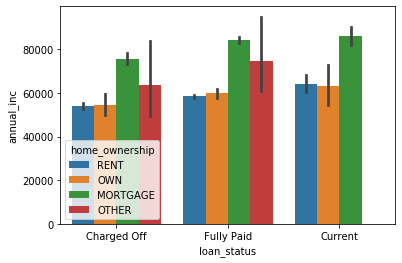

In [73]:
# Bar plot for annual income of applicants base on loan stauts and type of home ownership
sns.barplot(x="loan_status",y='annual_inc',hue='home_ownership',estimator=np.mean,data = loan_df)

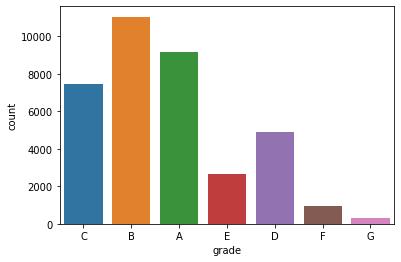

In [74]:
# Count of applicants for each LC grade
sns.countplot(x="grade",data = loan_df)

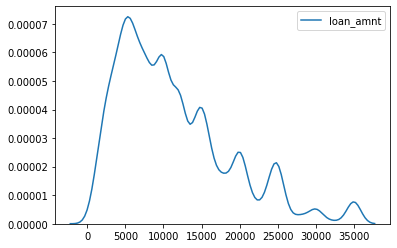

In [75]:
# Distribution of loan amount of applicants
sns.kdeplot(loan_df['loan_amnt'])

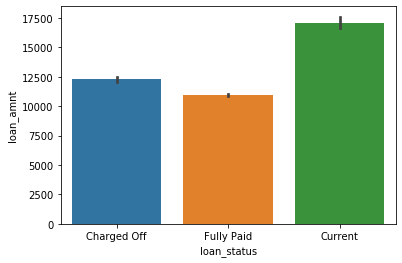

In [76]:
# Mean of each type of loan status
sns.barplot(x="loan_status",y='loan_amnt',data = loan_df,estimator=np.mean)

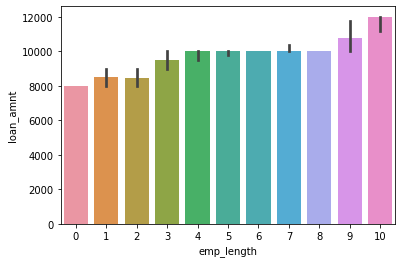

In [77]:
# The loan amount distribution based on employment length
sns.barplot(x='emp_length',y='loan_amnt',data = loan_df, estimator=np.median)

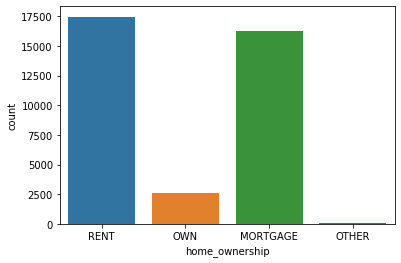

In [78]:
# Count of applicants for each type of home ownership
sns.countplot(x='home_ownership',data=loan_df)

## Risk Analysis 

There are two types of risks are associated with the bank’s decision:

**1. If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company**

**2. If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company**


First, we shall analyse the resons for which an applicant, who is likely to default, gets approved which may lead to financial loss of company. 

# Analysis - Applicant who is likely to default

Analysing the reasons for people to default their loan. 


In [79]:
# Creating a separate dataframe containing the Charged off applicants data 
loan_df_default = loan_df[loan_df['loan_status']=='Charged Off']

In [80]:
loan_df_default['annual_inc'].describe()

count    4.942000e+03
mean     6.302414e+04
std      4.741452e+04
min      4.080000e+03
25%      3.840000e+04
50%      5.400000e+04
75%      7.500000e+04
max      1.250000e+06
Name: annual_inc, dtype: float64

As you could see, the difference between the 50th percentile and mean of the data is not very large. Hence we can consider either the mean or median of the data to be the representative value of the column. Its better to take median as it is not impacted by the outliers. 


So, we take median to be the most representative value of the column - 54000.

# Hypothesis Testing - 1 (Criteria - Annual Income)

We are considering the annual income of applicants of charged off applications and to find the estimate of annual income for which he/she will default the loan


**Population : All Charged off applicants**

**Null Hypothesis :** The applicant defaults the loan when income <= 54,000 (Median)

**Alternate Hypothesis :** The applicant defaults the loan when income > 54,000 (Median)

**Data** 

Mean - 63,024

Std - 47415

Median - 54000

Confidence Level - 0.05

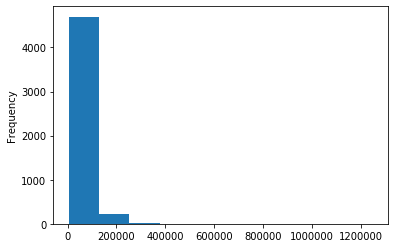

In [81]:
# Histogram for annual income of charged off applicants
loan_df_default['annual_inc'].plot.hist()

In [82]:
# Calculating the mean,standard deviation,median,z-score of the annual income column of the load_df_default dataset
mean = loan_df_default['annual_inc'].mean()
std  = loan_df_default['annual_inc'].std()
X = loan_df_default['annual_inc'].median()
n = len(loan_df_default['annual_inc'])

z = (X-mean)/std

(mean,std,X,n,z)

(63024.14461554027, 47414.52164828942, 54000.0, 4942, -0.19032448924570838)

In [83]:
# Converting the distribution of annual income into a normal distribution
loan_df_default['annual_inc'] = loan_df_default['annual_inc'].apply(lambda x: np.log(x))

C:\Users\deept\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


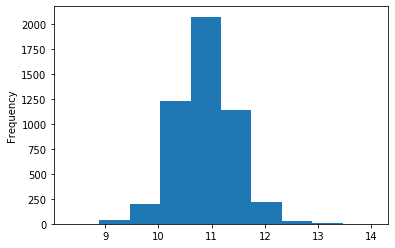

In [84]:
# Histogram for annual income of charged off applicants
loan_df_default['annual_inc'].plot.hist()

In [85]:
loan_df_default['annual_inc'].describe()

count    4942.000000
mean       10.894663
std         0.540752
min         8.313852
25%        10.555813
50%        10.896739
75%        11.225243
max        14.038654
Name: annual_inc, dtype: float64

In [86]:
# Calculting the p-value for the annual income column according to defined hypothesis
sm.stats.ztest(loan_df_default['annual_inc'], value = loan_df_default['annual_inc'].median(), alternative = "smaller")

(-0.2698675441920613, 0.39363107851648704)

## Conclusion of the hypothesis test
Since the p-value (0.39) is higher than the standard confidence level 0.05, we fail to reject the Null hypothesis that the mean annual income for applicants to default the loan is less than 54000.

There is no strong evidence in support for the alternatine hypothesis that the mean annual income for applicants to default the loan is greater than 54000.

**So, it is observed that if the applicant has an annual income of 54000 or less, they are more likely to default the loan.**

In [87]:
loan_df_default = loan_df[loan_df['loan_status']=='Charged Off']

In [88]:
loan_df_default['loan_amnt'].describe()

count     4942.000000
mean     12285.506880
std       8064.946352
min       1000.000000
25%       6000.000000
50%      10000.000000
75%      17000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

As you could see, the difference between the 75th percentile and maximum of the data is very large and hence we cant consider the mean of the data to be the representative value of the column. 


So, we take median to be the most representative value of the column - 10000.

# Hypothesis Testing - 2 (Criteria - Loan Amount)

We are considering the loan amount of applicants of charged off applications and to find the estimate of loan amount for which he/she will default the loan.

**Population : All Charged off applicants**

**Null Hypothesis :** The applicant defaults the loan when loan amount <= 10,000 (Median)

**Alternate Hypothesis :** The applicant defaults the loan when loan amount > 10,000 (Median)

**Data** 

Mean - 12285

Std - 8064

Median - 10000

Confidence Level - 0.05

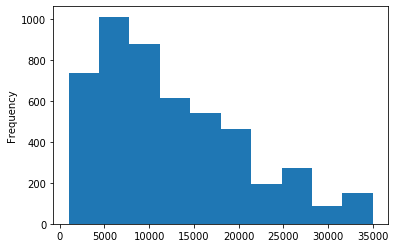

In [89]:
# Histogram for loan amount column 
loan_df_default['loan_amnt'].plot.hist()

In [90]:
# Calculating the mean, S.D, median, z-score, length of the loan amount column of load_df_default dataset
mean2 = loan_df_default['loan_amnt'].mean()
std2  = loan_df_default['loan_amnt'].std()
X2 = loan_df_default['loan_amnt'].median()
n2 = len(loan_df_default['loan_amnt'])

z2 = (X2-mean2)/std2

(mean2,std2,X2,n2,z2)

(12285.506879805747, 8064.94635164928, 10000.0, 4942, -0.28338773503910064)

In [91]:
# Converting the distribution of annual income into a normal distribution
loan_df_default['loan_amnt'] = loan_df_default['loan_amnt'].apply(lambda x: np.log(x))

C:\Users\deept\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


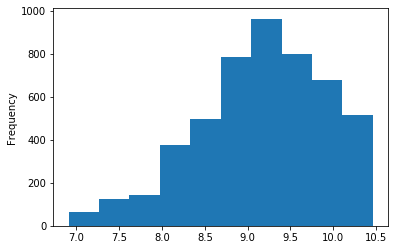

In [92]:
loan_df_default['loan_amnt'].plot.hist()

In [93]:
loan_df_default['loan_amnt'].describe()

count    4942.000000
mean        9.171581
std         0.751290
min         6.907755
25%         8.699515
50%         9.210340
75%         9.740969
max        10.463103
Name: loan_amnt, dtype: float64

In [94]:
# Calculting the p-value for the loan amount column according to defined hypothesis
sm.stats.ztest(loan_df_default['loan_amnt'], value = loan_df_default['loan_amnt'].median(), alternative = "smaller")

(-3.626746649687933, 0.00014350732658549651)

## Conclusion of the hypothesis test
Since the p-value (0.0001) is lower than the standard confidence level 0.05, we reject the Null hypothesis that the loan amount for applicants to default the loan is less than 10000.

There is strong evidence in support for the alternatine hypothesis that the loan amount for applicants to default the loan is greater than 10000.

**So, it is observed that if the applicant gets a loan amount of 10000 or more, they are more likely to default the loan.**

# Analysis based on criteria - Home Ownership

The data contains four types of home ownership of applicants - Rent, Mortage, Others, Own

In [95]:
loan_df_default = loan_df[loan_df['loan_status']=='Charged Off']

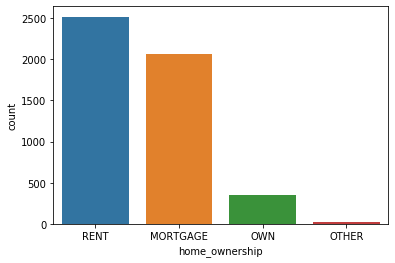

In [96]:
# Count of charged-off applicants based on typ of home ownership
sns.countplot(x='home_ownership',data=loan_df_default)

**As you could see from the plot, the applicants that have a rented house are most likely to default the loan.**

# Analysis based on criteria -  Number of Credit lines

Now, the count of default based on the number of open credit lines in the borrower's credit file.

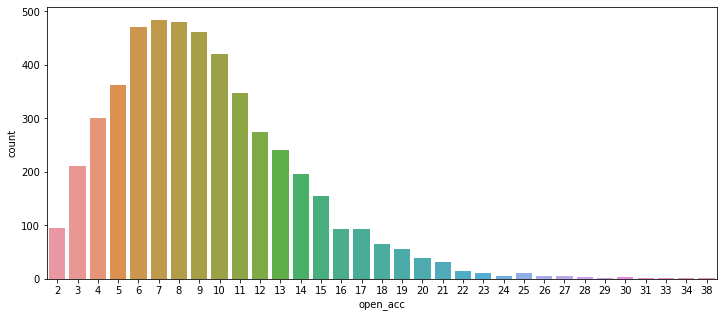

In [97]:
# Count of charged-off applicants based on the number of open credit lines in the borrower's credit file.
plt.figure(figsize = (12,5))
sns.countplot(x='open_acc',data = loan_df_default)

**From the plot, it is observed that the number of credit lines in a borrower's credit line has some impact but it cannot be considered to be a major driving factor for loan approval.**

# Analysis based on criteria - Purpose

Now, the count of default based on the purpose of loan is analysed.

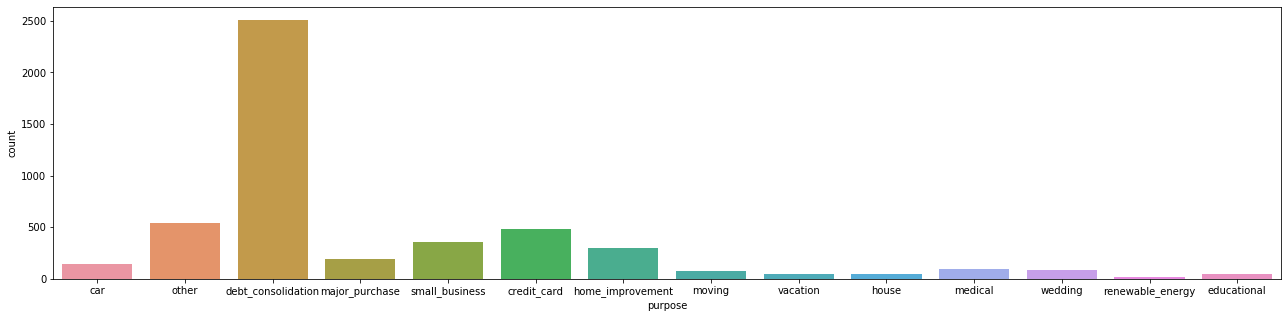

In [98]:
# Count of charged-off applicants based on the purpose of loan
plt.figure(figsize = (22,5))
sns.countplot(x='purpose',data=loan_df_default)

**The plot depicts the major amount of people default their loan when they approach for loan for debt consolidation.**

# Analysis based on criteria - Term of Loan 
Now, the count of default based on the term of loan is analysed.

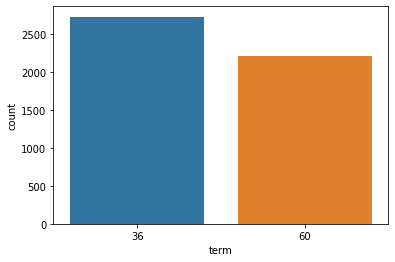

In [99]:
# Count of charged-off applicants based on the term of loan
sns.countplot(x='term',data=loan_df_default)

**The plot shows that people who apply for a loan with term = 36 months are more likely to default the loan. This can be because applying for high loan amount but having the term low can force the applicants to default the loan.** 

# Analysis based on criteria - Number of incidences of delinquency
Now, the count of default based on the number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years is analysed.

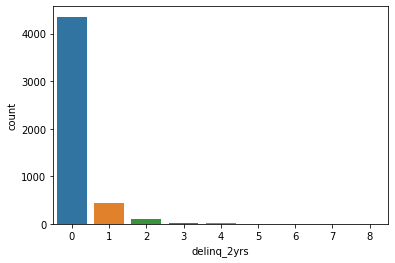

In [100]:
# Count of charged-off applicants based on the number of incidences of delinquency
sns.countplot(x='delinq_2yrs',data=loan_df_default)

**The number of incidences of delinquency is not a major driving factor for an applicant defaulting the loan. As you could see, majority of the applicants who has defaulted the loan hasn't had any 30+ days past due incidences of delinquency**

So, this does not give you an insight about why an applicant defaults the loan.

# Analysis based on criteria - Number of public record bankruptcies
Now, the count of default based on the Number of public record bankruptcies is analysed.

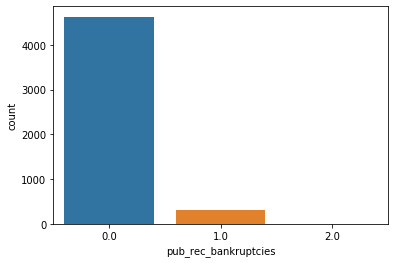

In [101]:
# Count of charged-off applicants based on the number of public record bankruptcies
sns.countplot(x='pub_rec_bankruptcies',data=loan_df_default)

**Similar to the last analysis, no. of public record bankruptcies is not a major driving force for an applicant to default the loan.**

# Analysis based on criteria - Number of credit lines currently in the borrower's credit file

Now, the count of default based on the number of credit lines currently in the borrower's credit file is analysed.

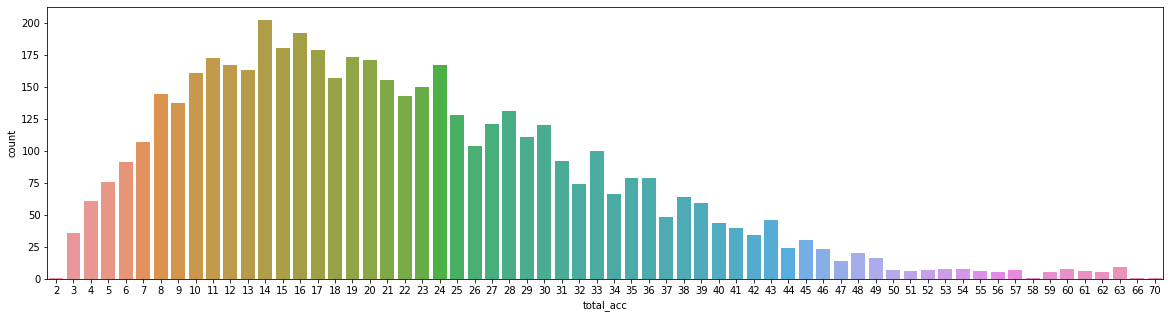

In [102]:
# Count of charged-off applicants based on the number of credit lines currently in the borrower's credit file
plt.figure(figsize = (20,5))
sns.countplot(x='total_acc',data=loan_df_default)

**From the plot, it is observed that the total number of credit lines currently in the borrower's credit file has some impact but it cannot be considered to be a major driving factor for loan approval. This can be considered when a lender cannot make a decison with the major driving factors.**

# Analysis - Rejection for an applicant who is likely to repay the loan

We have analysed the reasons for which the applicants tend to default the loan. 

But, there are two types of risks are associated with the bank’s decision:

**1. If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company**

**2. If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company**


We have to analyse the reasons for which an applicant, who is likely to repay the loan, gets rejected and this results in loss of business. 

In [103]:
# Creating a separate dataframe containing the Fully paid applicants data 
loan_df_repay = loan_df[loan_df['loan_status']=='Fully Paid']

In [104]:
loan_df_repay.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30423 entries, 3 to 39562
Data columns (total 40 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   loan_amnt                30423 non-null  int64         
 1   term                     30423 non-null  object        
 2   int_rate                 30423 non-null  float64       
 3   installment              30423 non-null  float64       
 4   grade                    30423 non-null  object        
 5   sub_grade                30423 non-null  object        
 6   emp_title                30423 non-null  object        
 7   emp_length               30423 non-null  int64         
 8   home_ownership           30423 non-null  object        
 9   annual_inc               30423 non-null  float64       
 10  verification_status      30423 non-null  object        
 11  issue_d                  30423 non-null  datetime64[ns]
 12  loan_status              30423 n

In [105]:
loan_df_repay['annual_inc'].describe()

count    3.042300e+04
mean     7.008435e+04
std      6.621626e+04
min      4.000000e+03
25%      4.200000e+04
50%      6.000000e+04
75%      8.400000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

As you could see, the difference between the 50th percentile and mean of the data is not very large. Hence we can consider either the mean or median of the data to be the representative value of the column. Its better to take median as it is not impacted by the outliers. 


So, we take median to be the most representative value of the column - 60000.

# Hypothesis Testing - 1 (Criteria - Annual Income)

We are considering the annual income of applicants of Fully paid applications and to find the estimate of annual income for which he/she will repay the loan


**Population : All Fully paid applicants**

**Null Hypothesis :** The applicant will repay the loan when income >= 60,000 (Median)

**Alternate Hypothesis :** The applicant will repay the loan when income < 60,000 (Median)

**Data** 

Mean - 70,084

Std - 66,216

Median - 60,000

Confidence Level - 0.05

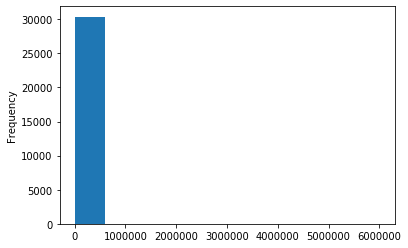

In [106]:
# Histogram of annual income column of fully paid applicants
loan_df_repay['annual_inc'].plot.hist()

In [107]:
# Calculating the mean, S.D, median, z-score, length of the loan amount column of load_df_repay dataset
mean3 = loan_df_repay['annual_inc'].mean()
std3  = loan_df_repay['annual_inc'].std()
X3 = loan_df_repay['annual_inc'].median()
n3 = len(loan_df_repay['annual_inc'])

z3 = (X3-mean3)/std3

(mean3,std3,X3,n3,z3)

(70084.35196134502, 66216.26469233024, 60000.0, 30423, -0.15229418343365236)

In [108]:
# Converting the distribution of annual income into a normal distribution
loan_df_repay['annual_inc'] = loan_df_repay['annual_inc'].apply(lambda x: np.log(x))

C:\Users\deept\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


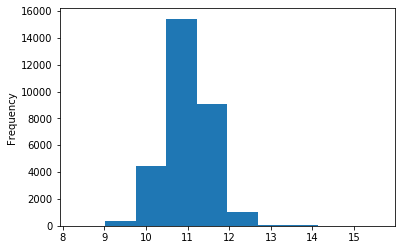

In [109]:
loan_df_repay['annual_inc'].plot.hist()

In [110]:
# Calculting the p-value for the annual income column according to defined hypothesis
sm.stats.ztest(loan_df_repay['annual_inc'], value = loan_df_repay['annual_inc'].median(), alternative = 'larger')

(-1.74026175234298, 0.9590934666156133)

## Conclusion of the hypothesis test 1

Since the p-value (0.96) is higher than the standard confidence level 0.05, we fail to reject the Null hypothesis that the annual income for applicants to repay the loan is greater than 60000.

There is no strong evidence in support for the alternatine hypothesis that the annual income for applicants who repay the loan is less than 60000.

**So, it is observed that if the applicant an annual income of 60000 or more, they will repay the loan.**

In [111]:
loan_df_repay = loan_df[loan_df['loan_status']=='Fully Paid']

In [112]:
loan_df_repay['loan_amnt'].describe()

count    30423.000000
mean     10945.992341
std       7181.841002
min        500.000000
25%       5500.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

As you could see, the difference between the 75th percentile and maximum of the data is very large and hence we cant consider the mean of the data to be the representative value of the column. 


So, we take median to be the most representative value of the column - 9600.

# Hypothesis Testing - 2 (Criteria - Loan Amount)

We are considering the loan amount of applicants of Fully paid applications and to find the estimate of loan amount for which he/she will repay the loan.

**Population : All Fully Paid applicants**

**Null Hypothesis :** The applicant repays the loan when loan amount <= 9600 (Median)

**Alternate Hypothesis :** The applicant repays the loan when loan amount > 9600 (Median)

**Data** 

Mean - 10,946

Std - 7182

Median - 9600

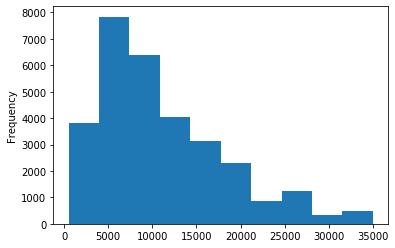

In [113]:
# Histogram of loan amount column of fully paid applicants
loan_df_repay['loan_amnt'].plot.hist()

In [114]:
# Converting the distribution of annual income into a normal distribution
loan_df_repay['loan_amnt'] = loan_df_repay['loan_amnt'].apply(lambda x: np.log(x))

C:\Users\deept\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [115]:
# Calculating the mean, S.D, median, z-score, length of the loan amount column of load_df_repay dataset
mean4 = loan_df_repay['loan_amnt'].mean()
std4  = loan_df_repay['loan_amnt'].std()
X4 = loan_df_repay['loan_amnt'].median()
n4 = len(loan_df_repay['loan_amnt'])

z4 = (X4-mean4)/std4

(mean4,std4,X4,n4,z4)

(9.071031282116394,
 0.7184140205072684,
 9.169518377455928,
 30423,
 0.13708960645004228)

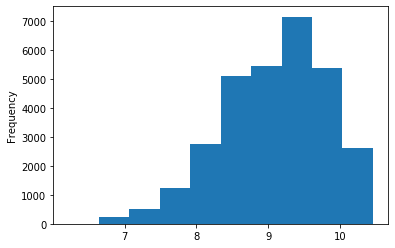

In [116]:
loan_df_repay['loan_amnt'].plot.hist()

In [117]:
loan_df_repay['loan_amnt'].describe()

count    30423.000000
mean         9.071031
std          0.718414
min          6.214608
25%          8.612503
50%          9.169518
75%          9.615805
max         10.463103
Name: loan_amnt, dtype: float64

In [118]:
# Calculting the p-value for the annual income column according to defined hypothesis
round(scipy.stats.norm.sf(z4),2)

0.45

## Conclusion of the hypothesis test
Since the p-value (0.45) is higher than the standard confidence level 0.05, we fail to reject the Null hypothesis that the loan amount for applicants to repay the loan is less than 9600.

There is no strong evidence in support for the alternatine hypothesis that the loan amount for which the applicants will repay the loan is greater than 9600.

**So, it is observed that if the applicant gets a loan amount of 9600 or less, they are more likely to repay the loan.**

In [119]:
loan_df_repay = loan_df[loan_df['loan_status']=='Fully Paid']

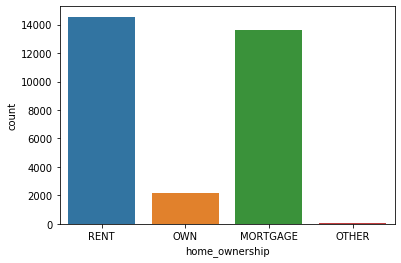

In [120]:
# Count of fully paid applicants based on type of home ownership
sns.countplot(x='home_ownership',data=loan_df_repay)

**As you could see from the plot, the applicants that have a rented house are most likely to repay the loan. But when we analysed for Charged-off applicants we got the same result. But when we consider the whole dataset, we get a different result.**

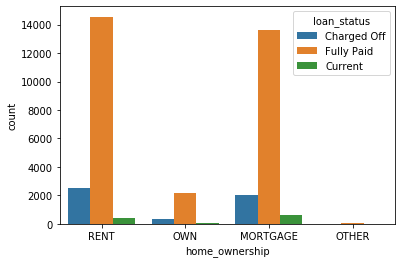

In [121]:
# Considering the whole dataset
sns.countplot(x='home_ownership',data=loan_df,hue='loan_status')

**We can't come to a conclusion because there is high proprtion of Fully Paid application than Charged-off application. So, more data can help us to come to conclusion over the impact of loan approval based on type of home ownership.**

# Analysis based on criteria -  Number of Credit lines

Now, the count of default based on the number of open credit lines in the borrower's credit file.

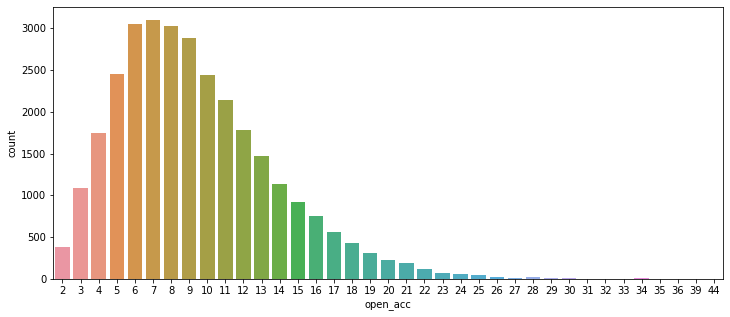

In [122]:
# Count of fully paid applicants based on the number of open credit lines in the borrower's credit file
plt.figure(figsize = (12,5))
sns.countplot(x='open_acc',data = loan_df_repay)

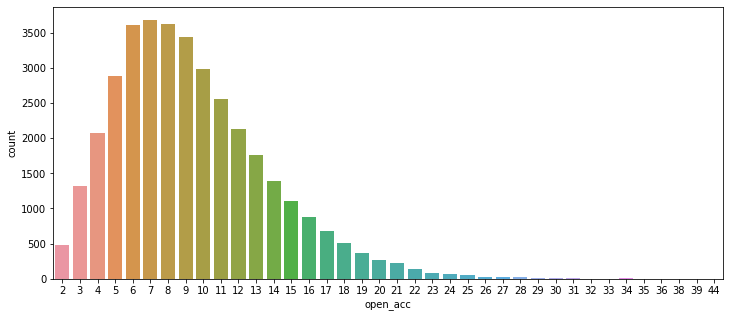

In [123]:
# Considering the whole dataset
plt.figure(figsize = (12,5))
sns.countplot(x='open_acc',data = loan_df)

**From the plot, it is observed that the number of credit lines in a borrower's credit line has some impact but it cannot be considered to be a major driving factor for loan approval.**

# Analysis based on criteria - Purpose

Now, the count of default based on the purpose of loan is analysed.

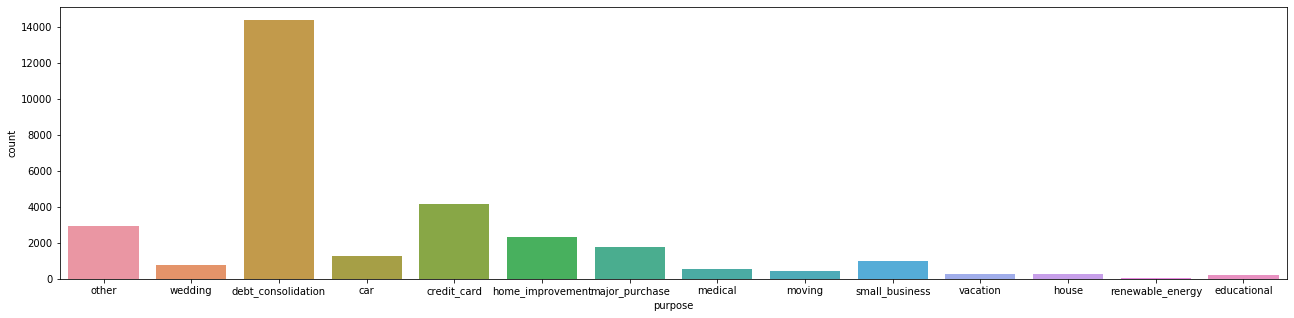

In [124]:
# Count of fully paid applicants based on the purpose of loan
plt.figure(figsize = (22,5))
sns.countplot(x='purpose',data=loan_df_repay)

**The plot depicts the major amount of people default their loan when they approach for loan for debt consolidation.**

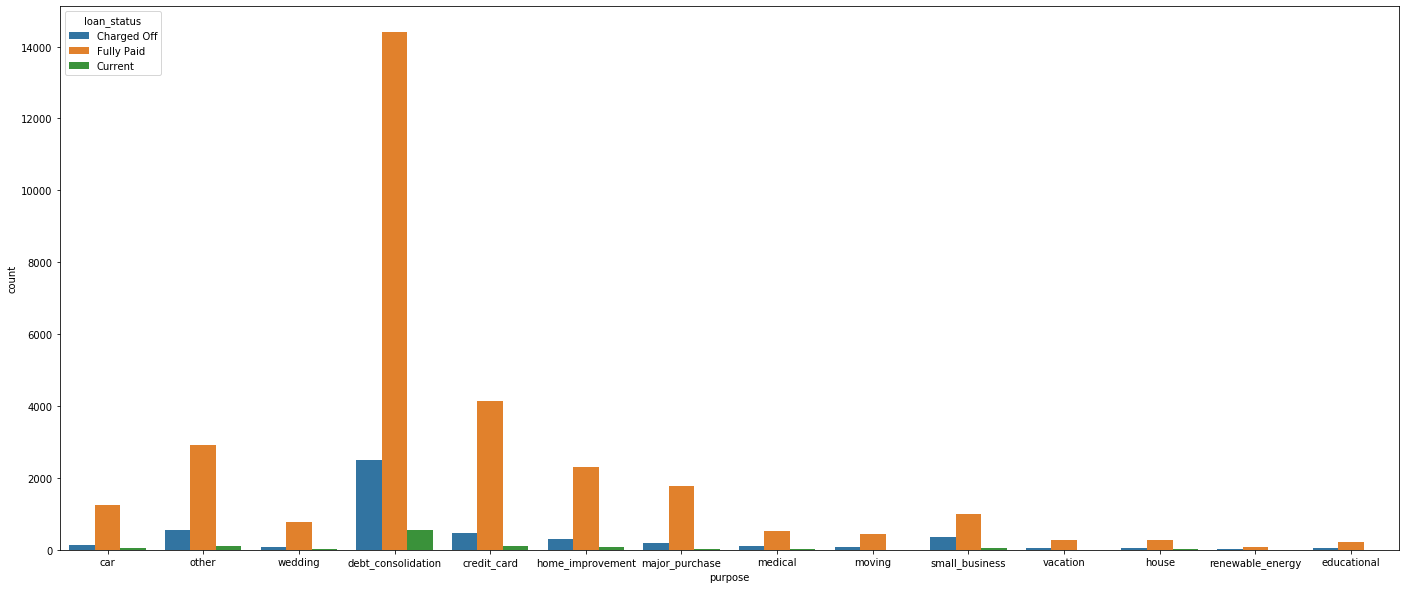

In [125]:
# Considering the whole dataset 
plt.figure(figsize = (24,10))
sns.countplot(x='purpose',data=loan_df,hue='loan_status')

# Analysis based on criteria - Term of Loan 

Now, the count of default based on the term of loan is analysed.

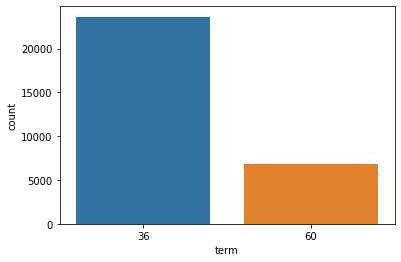

In [126]:
# Count of fully paid applicants based on the term of loan
sns.countplot(x='term',data=loan_df_repay)

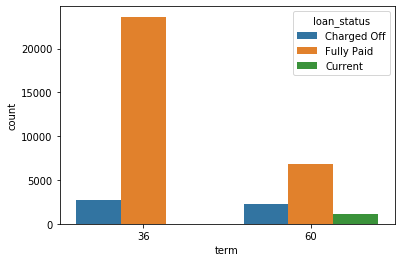

In [127]:
# Considering the whole dataset
sns.countplot(x='term',data=loan_df,hue='loan_status')

**The plot shows that people who apply for a loan with term = 36 months are more likely to repay the loan. This contradicts the earlier hypothesis. So, more data can help us to come to conclusion over the impact of loan approval based on term of loan.** 

# Analysis based on criteria - Number of incidences of delinquency

Now, the count of default based on the number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years is analysed.

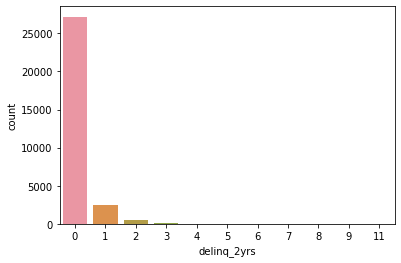

In [128]:
# Count of fully paid applicants based on the number of incidences of delinquency
sns.countplot(x='delinq_2yrs',data=loan_df_repay)

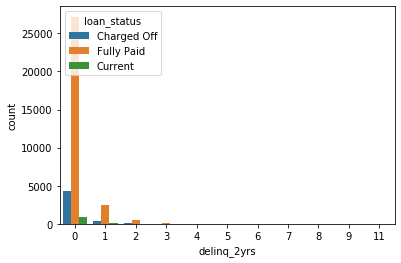

In [129]:
# Considering the whole dataset
sns.countplot(x='delinq_2yrs',data=loan_df,hue='loan_status')

**The number of incidences of delinquency is not a major driving factor for an applicant defaulting the loan. As you could see, majority of the applicants who has repayed the loan hasn't had any 30+ days past due incidences of delinquency**

So, this does not give you an insight about an applicant repaying the loan. More data will help us to get a clear idea. 

We can't come to a conclusion that number of incidences of delinquency impacts the loan approval because there is a high proportion of data for Fully paid applicants when compared to charged off applicants.

# Analysis based on criteria - Number of public record bankruptcies

Now, the count of default based on the Number of public record bankruptcies is analysed.

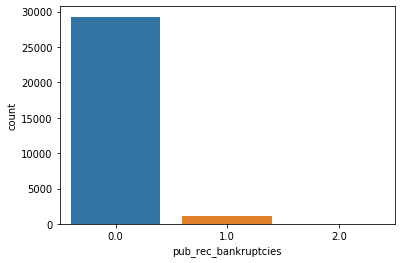

In [130]:
# Count of fully paid applicants based on the number of public record bankruptcies
sns.countplot(x='pub_rec_bankruptcies',data=loan_df_repay)

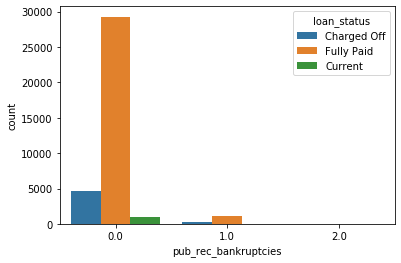

In [131]:
# Considering the whole dataset
sns.countplot(x='pub_rec_bankruptcies',data=loan_df,hue='loan_status')

**Similar to the last analysis, no. of public record bankruptcies is not a major driving force for an applicant to repay the loan.**

# Analysis based on criteria - Number of credit lines currently in the borrower's credit file

Now, the count of default based on the number of credit lines currently in the borrower's credit file is analysed.

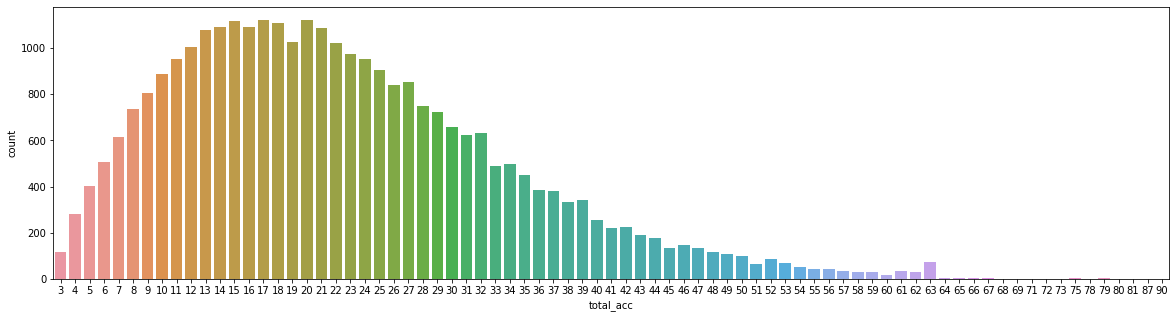

In [132]:
# Count of fully paid applicants based on the number of credit lines currently in the borrower's credit file
plt.figure(figsize = (20,5))
sns.countplot(x='total_acc',data=loan_df_repay)

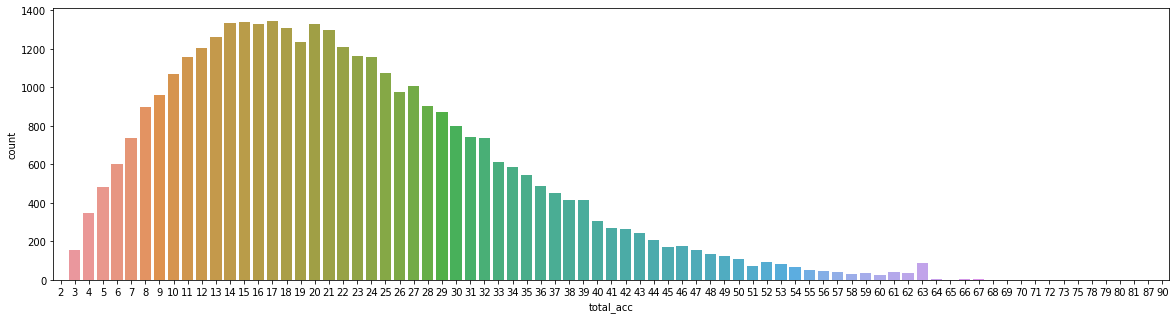

In [133]:
# Considering the whole dataset
plt.figure(figsize = (20,5))
sns.countplot(x='total_acc',data=loan_df)

**From the plot, it is observed that the total number of credit lines currently in the borrower's credit file has some impact but it cannot be considered to be a major driving factor for loan approval. This can be considered when a lender cannot make a decison with the major driving factors.**

# Key Observations

1. From the hypothesis test made on annual income of applicants, we can observe that the applicants default when annual income is less than or equal to 54,000 and repay the loan when annual income is more than 60,000. 


2. Subsequently, from the hypothesis test made on loan amount of applicants, we can observe that the applicants repay when loan amount is less than or equal to 9,600 and default the loan when loan amount is more than 10,000. 


3. The other factors like term, purpose, number of public record bankruptcies, Number of incidences of delinquency, number of credit lines, type of home ownership definitely has an imapct on predicting whether the applicant would default or repay the loan. But these aren't major factors and doesn't give a proven insight about the amount of impact it has on the loan approval. 


# Conclusion

1.  From the hypothesis testing made on Annual income of applicants, we can estimate an optimum value by which the decison making of loan approval can be processed. As you could see the minimum anuual income for an applicant to repay the loan is 60,000 and the limit below which the applicant is said to default is 54,000. **The limit for defaultation can be set from the given hypothesis as annual income <=60,000.**


2. From the hypothesis testing made on loan amount of applicants, we can estimate an optimum value by which the decison making of loan approval can be processed. As you could see the maximum loan amount for an applicant to repay the loan is 10,000 and the loan amount above which the applicant is said to default is 9,600. **The limit for defaultation can be set from the given hypothesis as loan amount >=9,600.**


3. The company should be **more careful** when the purpose of loan is debt consolidation. 


4. The company should be **assessing the annual income, loan amount, interest rate** etc. to have an estimate about the term of loan. 


5. The number of credit lines, public record bankruptcies, incidences of delinquency should be taken into consideration when the lendor can't make a decision with the major driving factors. 


6. Applicants who has a **Rented House are most likely to default**. But we **can't directly conclude** that loan should be rejected to people staying in rented houses. Much more detail should be given to other factors. 


7. As you could see, there is **no one or two major factors** that can be used for the decison making. A **lot of factors combined** and the taking the insights of each factor into consideration will definitely give a more clear and accurate decision for the loan approval process. 
